# Heart Disease Prediction – Data Science Project
##### In this project, we analyze heart disease data using Python. 
##### We perform data cleaning, exploratory data analysis (EDA), and build a machine learning model to predict heart disease.


## 1. Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset
##### Load the dataset and take an initial look at the data

In [9]:
data1=pd.read_csv("heart.csv")
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Basic Data Exploration
##### explore the structure:
##### information, datatypes, finding missing values

In [13]:
data1.shape

(303, 14)

In [17]:
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 4. Data Cleaning & Preprocessing
##### Found a duplicate values so first fix and remove duplicate values

In [31]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [24]:
data1.duplicated().sum()

np.int64(1)

In [25]:
data1=data1.drop_duplicates()

In [27]:
data1.shape

(302, 14)

In [30]:
data1.duplicated().sum()

np.int64(0)

## 5. Exploratory Data Analysis (EDA)
##### Data is cleaned, No missing values, remove duplicate values and correct datatypes. Now further analysis the data 

### 5.1 Distribution of Numerical Features
##### visualize the distribution of numerical variables to understand their spread and outliers

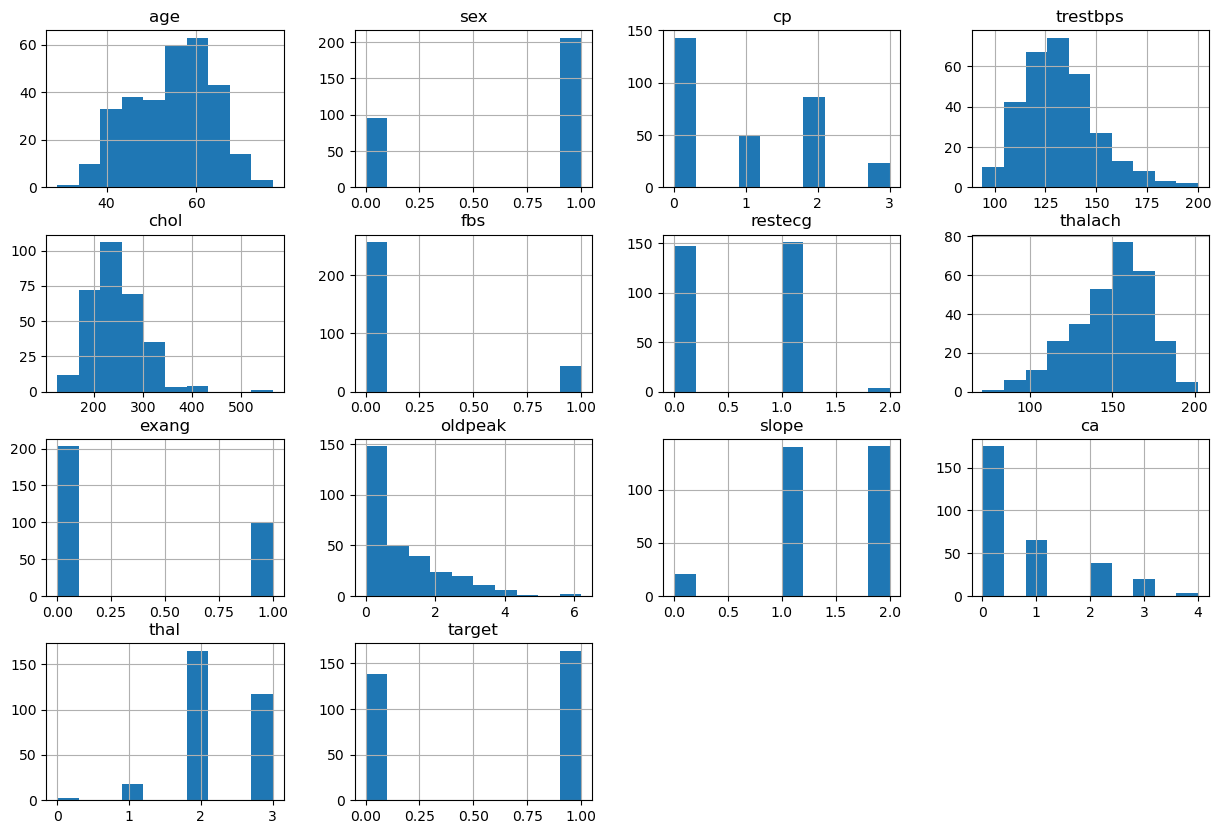

In [40]:
data1.hist(figsize=(15,10))
plt.show()

### 5.2 Correlation Heatmap
##### heatmap helps to identify relationships between features and the target variable

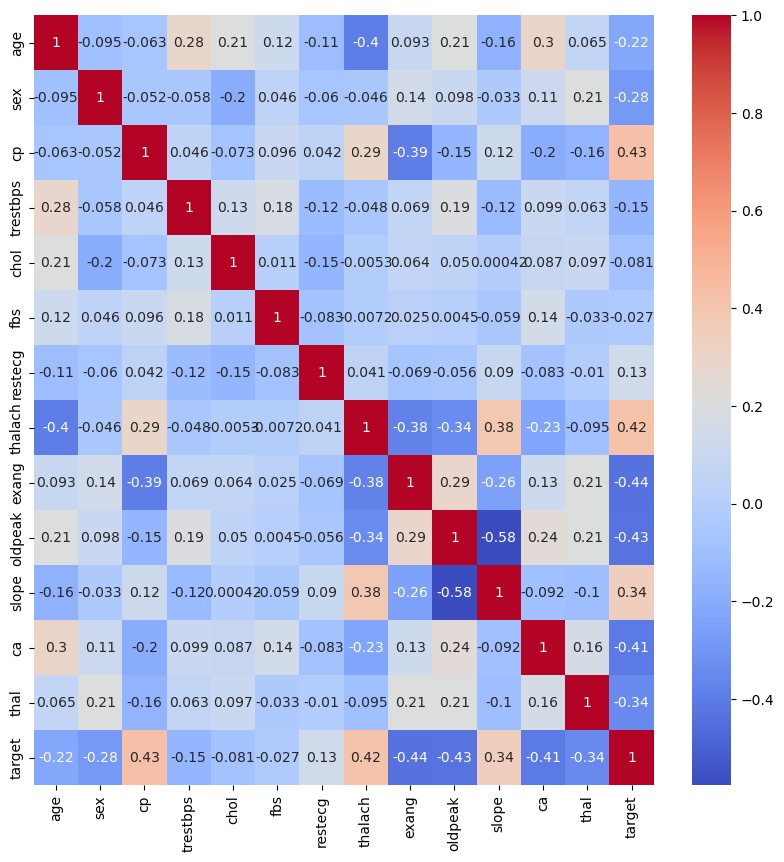

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm")
plt.show()

### 5.3 Heart Disease vs Categorical Features
##### analyze how categorical features (sex, chest pain, fasting blood sugar, etc.) relate to heart disease

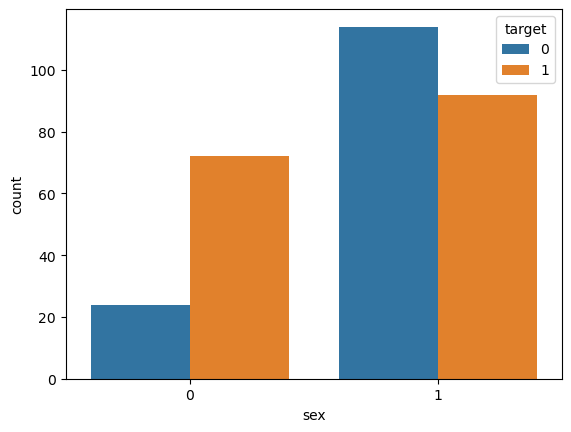

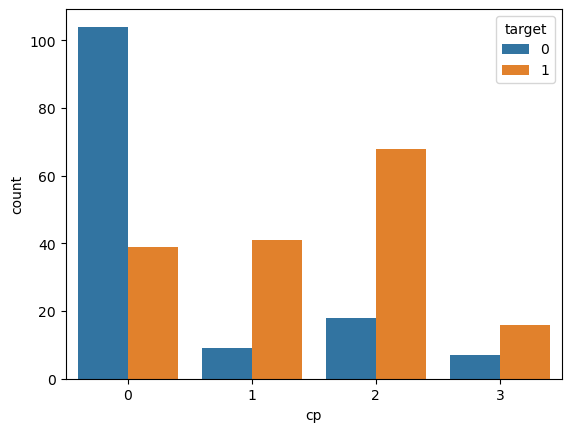

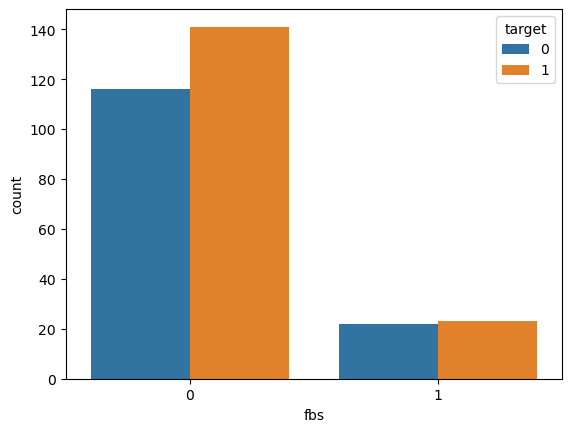

In [79]:
sns.countplot(data=data1, x="sex", hue="target")
plt.show()

sns.countplot(data=data1, x="cp", hue="target")
plt.show()

sns.countplot(data=data1, x="fbs", hue="target")
plt.show()

## 6. Splitting Data into Training & Testing Sets
##### separate the dataset into features (X) and target (y), then split into training and testing sets


In [48]:
from sklearn.model_selection import train_test_split

In [46]:
x = data1.drop("target", axis=1)
y=data1["target"]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, stratify=y)

## 7. Feature Scaling
##### Scaling improves model performance and helps gradient-based models converge faster


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.fit_transform(x_test)

## 8. Machine Learning Model (Logistic Regression)
##### train a Logistic Regression model as a baseline


In [52]:
from sklearn.linear_model import LogisticRegression

In [56]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_scale,y_train)
predt_y=model.predict(x_test_scale)

## 9. Model Evaluation
##### evaluate the model using accuracy, confusion matrix, and classification report

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
accuracy=accuracy_score(y_test,predt_y)


In [69]:
matrix=confusion_matrix(y_test,predt_y)

In [70]:
report=classification_report(y_test,predt_y)

In [78]:
print("Accuracy : \n ",accuracy)
print("\nConf. Matrix : \n",matrix)
print("\nClass. Report : \n",report)

Accuracy : 
  0.7692307692307693

Conf. Matrix : 
 [[29 13]
 [ 8 41]]

Class. Report : 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        42
           1       0.76      0.84      0.80        49

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



## 10. Key Insights

Based on the exploratory analysis and model performance, several important
patterns were observed:

1. Max heart rate (thalach) shows a strong relationship with the target variable.
   Patients with higher thalach values tend to have a higher chance of heart disease.
   (Seen in histograms and correlation matrix)

2. Chest pain type (cp) is one of the strongest categorical indicators.
   cp = 2 (non-anginal pain) and cp = 3 show a higher number of heart disease cases.

3. Oldpeak (ST depression) negatively correlates with the target.
   Higher oldpeak values are associated with a higher risk of heart disease.

4. Features such as slope, ca, and thal also show noticeable differences between
   heart disease and non–heart disease groups.

5. The correlation heatmap clearly shows that cp, thalach, and exang contribute 
   more strongly to predicting heart disease compared to other features.


## 11. Conclusion

This project explored the Heart Disease dataset using statistical summaries,
visualizations, and a Logistic Regression machine learning model.

After cleaning the data and removing duplicate entries (1 duplicate found and removed),
we performed EDA which revealed meaningful patterns in medical features such as
chest pain type, maximum heart rate, ST depression, and exercise-induced angina.

The Logistic Regression model achieved an accuracy of approximately 77%, which is a
reasonable baseline performance for a medical classification problem. The model
was able to distinguish between heart disease and non–heart disease cases with
good precision and recall.

Future improvements may include:
- Trying advanced ML models (Random Forest, XGBoost, SVM)
- Hyperparameter tuning to improve accuracy
- Using cross-validation for more stable results
- Deploying the model using Streamlit for interactive prediction

Overall, this project demonstrates a complete data science workflow from loading
and cleaning the data to visual exploration and machine learning prediction.
